# Getting Started 


## Data Cleaning Steps

1. **Remove Column Formatting Issues**  
   - Strip leading/trailing spaces from column names to avoid errors during analysis.

2. **Convert Dates**  
   - Convert raw text dates into proper `datetime` format so they can be sorted, filtered, and used in calculations.

3. **Identify Missing Values & Uniqueness**  
   - Check which columns have missing data and how many **unique values** each column contains.  
   - This helps identify categorical vs continuous variables.

4. **Check Data Types**  
   - Understand the type of each column (e.g., numbers, text, dates) so we can apply the correct operations later.


In [4]:
import pandas as pd

In [5]:
# dataset

df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Raw/Connected Data Case Study v2.csv")

In [6]:

# Step 1: Clean column names
# Why: Sometimes there are hidden spaces that cause bugs later (e.g. ' dp1 Score')

df.columns = df.columns.str.strip()



In [7]:
# Step 2: Convert date columns to datetime format
# Why: Date columns like 'Account Open Date' are currently stored as plain text
# Converting them lets us sort by date, filter by date, or calculate time differences

date_columns = ['Account Open Date', 'Last Payment Date', 
                'dp1 Latest Residency Confirmation Date', 
                'dp3 Latest Residency Confirmation Date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)  # Use dayfirst=True for UK-style dates


In [8]:
# Step 3: Understand the shape of the data

print("Shape of dataset:", df.shape)  # Rows and columns

Shape of dataset: (1000, 22)


In [9]:
# Step 4: Check missing values
# Why: Helps us understand which columns need fixing or special handling

missing_summary = df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:\n", missing_summary)




Missing values per column:
 dp3 Latest Residency Confirmation Date    266
dp3 Score                                 266
dp3 Match Level                           266
dp1 IVA/CCJ Flag                          234
dp1 Latest Residency Confirmation Date    234
dp1 Email Flag                            234
dp1 Deceased Flag                         234
dp1 Score                                 234
dp1 Mobile Flag                           234
dp3 Mobile Flag                           162
dp3 Email Flag                            162
Last Payment Date                          92
Arrears Balance                            91
dp2 Council Tax Band                       86
dp2 Occupancy Style                        44
dp1 Result Code                             0
Email Flag                                  0
Account Open Date                           0
Mobile Flag                                 0
Last Collections Action                     0
dp3 Match Type                              0
UID  

In [10]:
# Step 5: Check how many unique values each column has
# Why: Helps identify categorical columns vs continuous ones

unique_summary = df.nunique().sort_values(ascending=False)
print("\nUnique values per column:\n", unique_summary)




Unique values per column:
 UID                                       1000
Account Open Date                          953
Arrears Balance                            666
dp3 Latest Residency Confirmation Date     515
dp3 Score                                  373
dp1 Latest Residency Confirmation Date     265
Last Payment Date                          254
dp1 Score                                   97
dp3 Match Level                              9
dp2 Council Tax Band                         6
dp3 Match Type                               4
Last Collections Action                      4
dp1 Result Code                              4
dp2 Occupancy Style                          3
dp1 Email Flag                               2
Mobile Flag                                  2
dp1 Deceased Flag                            2
dp1 IVA/CCJ Flag                             2
Email Flag                                   2
dp3 Mobile Flag                              2
dp3 Email Flag                  

In [11]:
# Step 6: Check data types
# Why: We need to know which are numbers, text, dates, etc.

print("\nData types:\n", df.dtypes)


Data types:
 UID                                                int64
Account Open Date                         datetime64[ns]
Arrears Balance                                  float64
Last Payment Date                         datetime64[ns]
Last Collections Action                           object
Mobile Flag                                       object
Email Flag                                        object
dp1 Result Code                                   object
dp1 IVA/CCJ Flag                                  object
dp1 Score                                        float64
dp1 Deceased Flag                                 object
dp1 Mobile Flag                                   object
dp1 Email Flag                                    object
dp1 Latest Residency Confirmation Date    datetime64[ns]
dp2 Council Tax Band                              object
dp2 Occupancy Style                               object
dp3 Match Type                                    object
dp3 Match Level  

In [12]:
df.to_csv('/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data.csv', index=False)



# Question- 1


In [13]:
import pandas as pd

# dataset 
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data.csv")

# Counting Combination
comparison = df.groupby(['dp1 Result Code', 'dp3 Match Type']).size().reset_index(name='Count')

# pivot table 
comparison_matrix = comparison.pivot(
    index='dp1 Result Code',
    columns='dp3 Match Type',
    values='Count'
).fillna(0).astype(int)  # Filling empty cells with 0


ordered_rows = ['Resident', 'Forwarding Address', 'Unmatched', 'Deceased']
ordered_columns = ['Resident', 'Forwarding Address', 'Unmatched', 'Deceased']
comparison_matrix = comparison_matrix.reindex(index=ordered_rows, columns=ordered_columns)


print("\n DP1 vs DP3 Residency Comparison Matrix (Rows & Columns Ordered):")
print(" ")
print(comparison_matrix)






 DP1 vs DP3 Residency Comparison Matrix (Rows & Columns Ordered):
 
dp3 Match Type      Resident  Forwarding Address  Unmatched  Deceased
dp1 Result Code                                                      
Resident                 548                  37         49        21
Forwarding Address        17                  18          2         7
Unmatched                 81                  29        109        15
Deceased                   2                   2          2        61


## DP1 vs DP3 Residency Comparison Matrix (Rows & Columns Ordered)

| **Dp1 Result Code ↓ / Dp3 Match Type →** | Resident | Forwarding Address | Unmatched | Deceased |
|------------------------------------------|----------|---------------------|-----------|----------|
| **Resident**                             | **548**  | 37                  | 49        | 21       |
| **Forwarding Address**                   | 17       | 18                  | 2         | 7        |
| **Unmatched**                            | 81       | 29                  | 109       | 15       |
| **Deceased**                             | 2        | 2                   | 2         | **61**   |


## Exploring other methods 

In [14]:
import pandas as pd
# 1. Agreement vs Disagreement Rate

# Create flags
df['dp1_resident'] = df['dp1 Result Code'] == 'Resident'
df['dp3_resident'] = df['dp3 Match Type'] == 'Resident'
df['agreed_resident'] = df['dp1_resident'] & df['dp3_resident']

# Agreement rate
total = len(df)
agreed = df['agreed_resident'].sum()
disagreed = total - agreed

print(f" Agreed on Resident: {agreed} ({agreed/total:.1%})")
print(f" Disagreed or Unmatched: {disagreed} ({disagreed/total:.1%})")


 Agreed on Resident: 548 (54.8%)
 Disagreed or Unmatched: 452 (45.2%)


In [15]:
# 2. Score Difference Analysis

df['Score Difference'] = df['dp1 Score'] - df['dp3 Score']


## Key Findings

### 1. Agreement on "Resident"
- **548 clients** are marked *Resident* by both dp1 and dp3 — strong confirmation.
- This group represents the highest confidence for traceable and contactable clients.

### 2. Disagreements
- **49 clients**: dp1 = *Resident*, dp3 = *Unmatched* → disagreement.
- **37 clients**: dp1 = *Resident*, dp3 = *Forwarding* → likely moved.

**Interpretation:**  
dp3 provides valuable updates or corrections to dp1.  
Using both sources together gives a **fuller, more accurate picture** of each client.

### 3. Deceased Mismatches
- **21 clients** are marked *Resident* by dp1 but *Deceased* by dp3.
- This is a critical finding — dp3 may be capturing death records that dp1 misses.

**Impact:**  
Combining both sources helps **avoid serious errors**, such as contacting deceased individuals.

### 4. Coverage Boost
- Using **only dp1** means missing dp3’s updates and enhancements.
- Using **only dp3** means missing dp1’s confirmations.

### Therefore, combining both partners gives us:
- More accurate residency confirmation
- Better risk and compliance control
- Higher right-party contact rates


## Method I Suggest

---

### Contactability Uplift Through Agreement & Disagreement Zones

Let’s divide all clients into 4 zones based on what dp1 and dp3 say about residency — and compare how contactable they are in each zone.

---

### The 4 Zones:

| Zone    | dp1 Result Code | dp3 Match Type | What It Means                         |
|---------|------------------|----------------|----------------------------------------|
| ZONE 1  | Resident          | Resident       | High confidence — strong agreement     |
| ZONE 2  | Resident          | NOT Resident   | dp1 says yes, dp3 says no              |
| ZONE 3  | NOT Resident      | Resident       | dp1 missed, dp3 found them             |
| ZONE 4  | NOT Resident      | NOT Resident   | Neither can confirm                    |

---

### Interpretation Summary:

1. **Zone 1** → both dp1 and dp3 say *"Resident"*
2. **Zone 2** → dp1 says *"Resident"*, dp3 says something else
3. **Zone 3** → dp3 says *"Resident"*, dp1 says something else
4. **Zone 4** → both say *NOT Resident*


In [16]:
import pandas as pd

# dataset
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data.csv")

#  function assiging residency zones
def assign_residency_zone(row):
    dp1 = row['dp1 Result Code']
    dp3 = row['dp3 Match Type']
    
    if dp1 == "Resident" and dp3 == "Resident":
        return "Zone 1 - Agreement"
    elif dp1 == "Resident" and dp3 != "Resident":
        return "Zone 2 - Only dp1 says Resident"
    elif dp1 != "Resident" and dp3 == "Resident":
        return "Zone 3 - Only dp3 says Resident"
    else:
        return "Zone 4 - Neither says Resident"


df['Residency Zone'] = df.apply(assign_residency_zone, axis=1)




In [ ]:
# modified dataFrame with the new Residency Zone column
#df.to_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data_with_zones.csv", index=False)


In [20]:
# seeing how many clients fall into each zone
zone_counts = df['Residency Zone'].value_counts()
print("\nClient counts by residency zone:\n")
print(zone_counts)


Client counts by residency zone:

Residency Zone
Zone 1 - Agreement                 548
Zone 4 - Neither says Resident     245
Zone 2 - Only dp1 says Resident    107
Zone 3 - Only dp3 says Resident    100
Name: count, dtype: int64


## My Analysis Summary

I grouped clients into 4 residency zones based on whether dp1 and dp3 agreed or disagreed on the client’s address.  
Then I calculated the percentage of clients with mobile/email contact, as well as average dp1 and dp3 scores.

### Key Findings:

1. **Zone 1 (Agreement)** had the highest score confidence, and strong mobile availability (**41.2%**).

2. **Zone 3 (Only dp3 says Resident)** showed that dp3 recovered **42% mobile contact** from clients that dp1 would have missed.

3. **Zone 4 (Neither partner says Resident)** had low scores and contactability, proving the value of data filtering and deprioritisation.

4. **dp1 scores were lowest in Zone 4 and highest in Zone 1**, suggesting that dp1 scores are consistent with confirmed residency.

### Conclusion:

Combining dp1 and dp3 provides better residency confirmation, enhances contactability, and supports smarter client targeting.


In [21]:


import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data_with_zones.csv")

# Create a function to assign residency zones
def assign_residency_zone(row):
    dp1 = row['dp1 Result Code']
    dp3 = row['dp3 Match Type']
    
    if dp1 == "Resident" and dp3 == "Resident":
        return "Zone 1 - Agreement"
    elif dp1 == "Resident" and dp3 != "Resident":
        return "Zone 2 - Only dp1 says Resident"
    elif dp1 != "Resident" and dp3 == "Resident":
        return "Zone 3 - Only dp3 says Resident"
    else:
        return "Zone 4 - Neither says Resident"

# Apply zone function
df['Residency Zone'] = df.apply(assign_residency_zone, axis=1)

# Standardize contact flag values
df['Mobile Flag'] = df['Mobile Flag'].str.strip().str.upper()
df['Email Flag'] = df['Email Flag'].str.strip().str.upper()

# Group and summarize key metrics per zone
summary = df.groupby('Residency Zone').agg(
    Total_Clients=('UID', 'count'),
    Mobile_Y=('Mobile Flag', lambda x: (x == 'Y').sum()),
    Email_Y=('Email Flag', lambda x: (x == 'Y').sum()),
    Avg_dp1_Score=('dp1 Score', 'mean'),
    Avg_dp3_Score=('dp3 Score', 'mean'),
    Avg_Arrears=('Arrears Balance', 'mean')
).reset_index()

# Calculate contactability percentages
summary['% Mobile Available'] = (summary['Mobile_Y'] / summary['Total_Clients'] * 100).round(2)
summary['% Email Available'] = (summary['Email_Y'] / summary['Total_Clients'] * 100).round(2)

# Final formatted columns
summary = summary[['Residency Zone', 'Total_Clients', '% Mobile Available', '% Email Available',
                   'Avg_dp1_Score', 'Avg_dp3_Score', 'Avg_Arrears']]

# Rename columns for clean presentation
summary.columns = [
    'Residency Zone',
    'Total Clients',
    '% Mobile Available',
    '% Email Available',
    'Avg dp1 Score',
    'Avg dp3 Score',
    'Avg Arrears (£)'
]

# Optional: Format floats to look clean
pd.options.display.float_format = '{:,.2f}'.format

# Print final summary
print("\nContactability & Scores by Residency Zone:\n")
print(summary.to_string(index=False))




Contactability & Scores by Residency Zone:

                 Residency Zone  Total Clients  % Mobile Available  % Email Available  Avg dp1 Score  Avg dp3 Score  Avg Arrears (£)
             Zone 1 - Agreement            548               41.24              29.20          65.55         747.04         1,351.33
Zone 2 - Only dp1 says Resident            107               40.19              35.51          64.31         717.65         1,483.55
Zone 3 - Only dp3 says Resident            100               42.00              31.00          58.26         744.56         1,222.18
 Zone 4 - Neither says Resident            245               40.41              26.94          24.05         778.10         1,338.54


##  My Inference

---

### 1.  dp3 Adds Value — Especially in *Zone 3*

100 clients that dp1 **missed** are **rescued by dp3**. These clients show:

-  Highest mobile contact rate: **42%**
-  Strong email match rate: **31%**
-  Solid dp3 scores

>  **Conclusion:** *dp3 identifies traceable clients that dp1 would miss — and they’re just as contactable.*

---

### 2.  Combining dp1 + dp3 Gives the Best Chance of Success

-  **Zone 1 (Agreement)** = Confident outreach target
-  **Zone 2 & 3** show that **either partner alone misses valuable clients**
- Combining both reduces risk of errors
    - e.g., dp1 = Unmatched but dp3 = Resident 

>  **Conclusion:** *Using both partners leads to stronger targeting, better decisions, and fewer missed opportunities.*

---

### 3.  Zone 4 Should Be De prioritized

- Neither partner confirms residency
- Lowest **email availability** (26.9%)
- Lowest **dp1 Score** (24.05)

> **Conclusion:** *We should avoid wasting resources on Zone 4 clients.*

---

###  Final Takeaway

>   This proves that combining dp1 and dp3:
> - Improves **residency confirmation**
> - Enhances **contact data**
> - Helps deliver **measurable business outcomes**


## Visualisations 

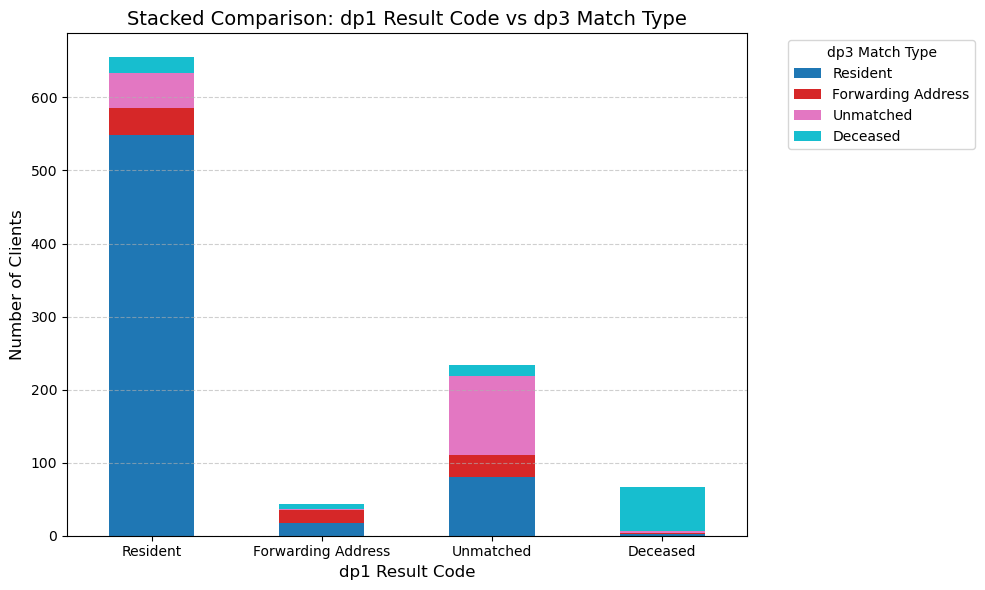

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data.csv")

# Create grouped data
comparison = df.groupby(['dp1 Result Code', 'dp3 Match Type']).size().reset_index(name='Count')
matrix = comparison.pivot(index='dp1 Result Code', columns='dp3 Match Type', values='Count').fillna(0).astype(int)

# Custom order for rows and columns
ordered_rows = ['Resident', 'Forwarding Address', 'Unmatched', 'Deceased']
ordered_columns = ['Resident', 'Forwarding Address', 'Unmatched', 'Deceased']
matrix = matrix.reindex(index=ordered_rows, columns=ordered_columns)

# Plot stacked bar chart
ax = matrix.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')

# Add titles and labels
plt.title("Stacked Comparison: dp1 Result Code vs dp3 Match Type", fontsize=14)
plt.xlabel("dp1 Result Code", fontsize=12)
plt.ylabel("Number of Clients", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="dp3 Match Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


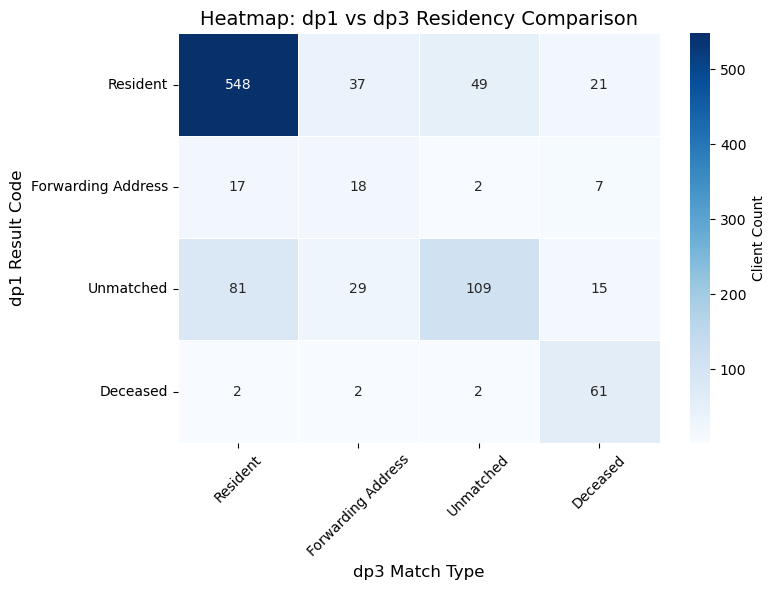

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data.csv")

# Create pivot table again
comparison = df.groupby(['dp1 Result Code', 'dp3 Match Type']).size().reset_index(name='Count')
matrix = comparison.pivot(index='dp1 Result Code', columns='dp3 Match Type', values='Count').fillna(0).astype(int)

# Custom order
ordered_rows = ['Resident', 'Forwarding Address', 'Unmatched', 'Deceased']
ordered_cols = ['Resident', 'Forwarding Address', 'Unmatched', 'Deceased']
matrix = matrix.reindex(index=ordered_rows, columns=ordered_cols)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar_kws={"label": "Client Count"})

# Labels and titles
plt.title("Heatmap: dp1 vs dp3 Residency Comparison", fontsize=14)
plt.xlabel("dp3 Match Type", fontsize=12)
plt.ylabel("dp1 Result Code", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


## Contact Enhancement

In [30]:
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv("/Users/rg/ACADEMICS/Interview/Connected Data Comapany/MAY/Dataset/Modified/cleaned_connected_data_with_zones.csv")

# Step 1: Clean and prepare the flags
df['Mobile Flag'] = df['Mobile Flag'].str.strip().str.upper()
df['Email Flag'] = df['Email Flag'].str.strip().str.upper()

# Step 2: Create a new flag - Has Both Mobile and Email
df['Has_Both'] = (df['Mobile Flag'] == 'Y') & (df['Email Flag'] == 'Y')

# Step 3: Group by Residency Zone
summary = df.groupby('Residency Zone').agg(
    Total_Clients=('UID', 'count'),
    Has_Mobile=('Mobile Flag', lambda x: (x == 'Y').sum()),
    Has_Email=('Email Flag', lambda x: (x == 'Y').sum()),
    Has_Both=('Has_Both', 'sum')
).reset_index()

# Step 4: Calculate percentage contactability
summary['% Mobile Available'] = (summary['Has_Mobile'] / summary['Total_Clients'] * 100).round(1)
summary['% Email Available'] = (summary['Has_Email'] / summary['Total_Clients'] * 100).round(1)
summary['% Has Both'] = (summary['Has_Both'] / summary['Total_Clients'] * 100).round(1)

# Step 5: Final output
final_summary = summary[['Residency Zone', 'Total_Clients', '% Mobile Available', '% Email Available', '% Has Both']]

# Display the result
print("\n📊 Contactability by Residency Zone:\n")
print(final_summary.to_string(index=False))



📊 Contactability by Residency Zone:

                 Residency Zone  Total_Clients  % Mobile Available  % Email Available  % Has Both
             Zone 1 - Agreement            548               41.20              29.20        0.00
Zone 2 - Only dp1 says Resident            107               40.20              35.50        0.00
Zone 3 - Only dp3 says Resident            100               42.00              31.00        0.00
 Zone 4 - Neither says Resident            245               40.40              26.90        0.00


no client has both mobile and email flagged as 'Y' in our dataset.

It is a valuable insight:
“Across all residency zones, not a single client had both mobile and email.
This shows the contact data is very shallow, we need enhance it through external partners is essential.”